# Decision Tree & Random Forrest

In [22]:
# Import required packages for this chapter
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
#%pip install dmba
#%pip install pydotplus
from dmba import plotDecisionTree
from sklearn.ensemble import RandomForestClassifier

# Competitive Auctions on eBay.com

The file _eBayauctions.csv_ contains information on 1972 auctions that transacted on eBay.com during May–June 2004. The goal
is to use these data to build a model that will classify auctions as competitive or noncompetitive. A _competitive auction_ is defined as an auction with at least two bids placed on the item auctioned. The data include variables that describe the item (auction category), the seller (his/her eBay rating), and the auction terms that the seller selected (auction duration, opening price, currency, day-of-week of auction close). In addition, we have the price at which the auction closed. The task is to predict whether or not the auction will be competitive based on item (auction category), seller information (seller rating), and auction characteristics (duration and open price).

__Data Preprocessing.__ Convert variable _Duration_ into a categorical variable. Split the
data into training (60%) and validation (40%) datasets.

In [23]:
# Load the data into ebay_df dataframe
ebay_df=pd.read_csv("eBayauctions.csv")


# Use critical functions to explore the dataframe using print() to show results
print(ebay_df.columns)
print(ebay_df.describe)

Index(['Category', 'currency', 'sellerRating', 'Duration', 'endDay',
       'ClosePrice', 'OpenPrice', 'Competitive?'],
      dtype='object')
<bound method NDFrame.describe of               Category currency  sellerRating  Duration endDay  ClosePrice  \
0     Music/Movie/Game       US          3249         5    Mon        0.01   
1     Music/Movie/Game       US          3249         5    Mon        0.01   
2     Music/Movie/Game       US          3249         5    Mon        0.01   
3     Music/Movie/Game       US          3249         5    Mon        0.01   
4     Music/Movie/Game       US          3249         5    Mon        0.01   
...                ...      ...           ...       ...    ...         ...   
1967        Automotive       US          2992         5    Sun      359.95   
1968        Automotive       US            21         5    Sat      610.00   
1969        Automotive       US          1400         5    Mon      549.00   
1970        Automotive       US            5

In [24]:
# clean the dataset.
# drop all the non-usable variables
# convert categorical variables into indicator while dropping the first column of each of them to create n-1 dummies for n categorical variables.
dummy_category=pd.get_dummies(ebay_df['Category'])

print(dummy_category.head(3))

dummy_duration=pd.get_dummies(ebay_df['Duration'])

print(dummy_duration.head(3))

ebay_df = pd.concat([ebay_df,dummy_category],axis=1)

ebay_df = pd.concat([ebay_df,dummy_duration],axis=1)



   Antique/Art/Craft  Automotive  Books  Business/Industrial  \
0                  0           0      0                    0   
1                  0           0      0                    0   
2                  0           0      0                    0   

   Clothing/Accessories  Coins/Stamps  Collectibles  Computer  Electronics  \
0                     0             0             0         0            0   
1                     0             0             0         0            0   
2                     0             0             0         0            0   

   EverythingElse  Health/Beauty  Home/Garden  Jewelry  Music/Movie/Game  \
0               0              0            0        0                 1   
1               0              0            0        0                 1   
2               0              0            0        0                 1   

   Photography  Pottery/Glass  SportingGoods  Toys/Hobbies  
0            0              0              0             0  
1  

In [25]:
print(ebay_df.head())
print(ebay_df.columns)



           Category currency  sellerRating  Duration endDay  ClosePrice  \
0  Music/Movie/Game       US          3249         5    Mon        0.01   
1  Music/Movie/Game       US          3249         5    Mon        0.01   
2  Music/Movie/Game       US          3249         5    Mon        0.01   
3  Music/Movie/Game       US          3249         5    Mon        0.01   
4  Music/Movie/Game       US          3249         5    Mon        0.01   

   OpenPrice  Competitive?  Antique/Art/Craft  Automotive  ...  \
0       0.01             0                  0           0  ...   
1       0.01             0                  0           0  ...   
2       0.01             0                  0           0  ...   
3       0.01             0                  0           0  ...   
4       0.01             0                  0           0  ...   

   Music/Movie/Game  Photography  Pottery/Glass  SportingGoods  Toys/Hobbies  \
0                 1            0              0              0          

In [26]:
# remove question mark from response name
# convert variable Duration to categorical data type
# Separate out predictors and outcome variable 



X = ebay_df[['sellerRating', 1, 3,5,7,10, 'OpenPrice','Antique/Art/Craft','Automotive','Books','Business/Industrial','Clothing/Accessories',
'Coins/Stamps', 'Collectibles','Computer', 'Electronics', 'EverythingElse',
'Health/Beauty', 'Home/Garden',  'Jewelry',
'Music/Movie/Game', 'Photography', 'Pottery/Glass','SportingGoods', 'Toys/Hobbies' ]]
y = ebay_df['Competitive?']


print(X.head(),"\n",y.head())



   sellerRating  1  3  5  7  10  OpenPrice  Antique/Art/Craft  Automotive  \
0          3249  0  0  1  0   0       0.01                  0           0   
1          3249  0  0  1  0   0       0.01                  0           0   
2          3249  0  0  1  0   0       0.01                  0           0   
3          3249  0  0  1  0   0       0.01                  0           0   
4          3249  0  0  1  0   0       0.01                  0           0   

   Books  ...  Electronics  EverythingElse  Health/Beauty  Home/Garden  \
0      0  ...            0               0              0            0   
1      0  ...            0               0              0            0   
2      0  ...            0               0              0            0   
3      0  ...            0               0              0            0   
4      0  ...            0               0              0            0   

   Jewelry  Music/Movie/Game  Photography  Pottery/Glass  SportingGoods  \
0        0       

(1183, 25)
0.6894803548795945


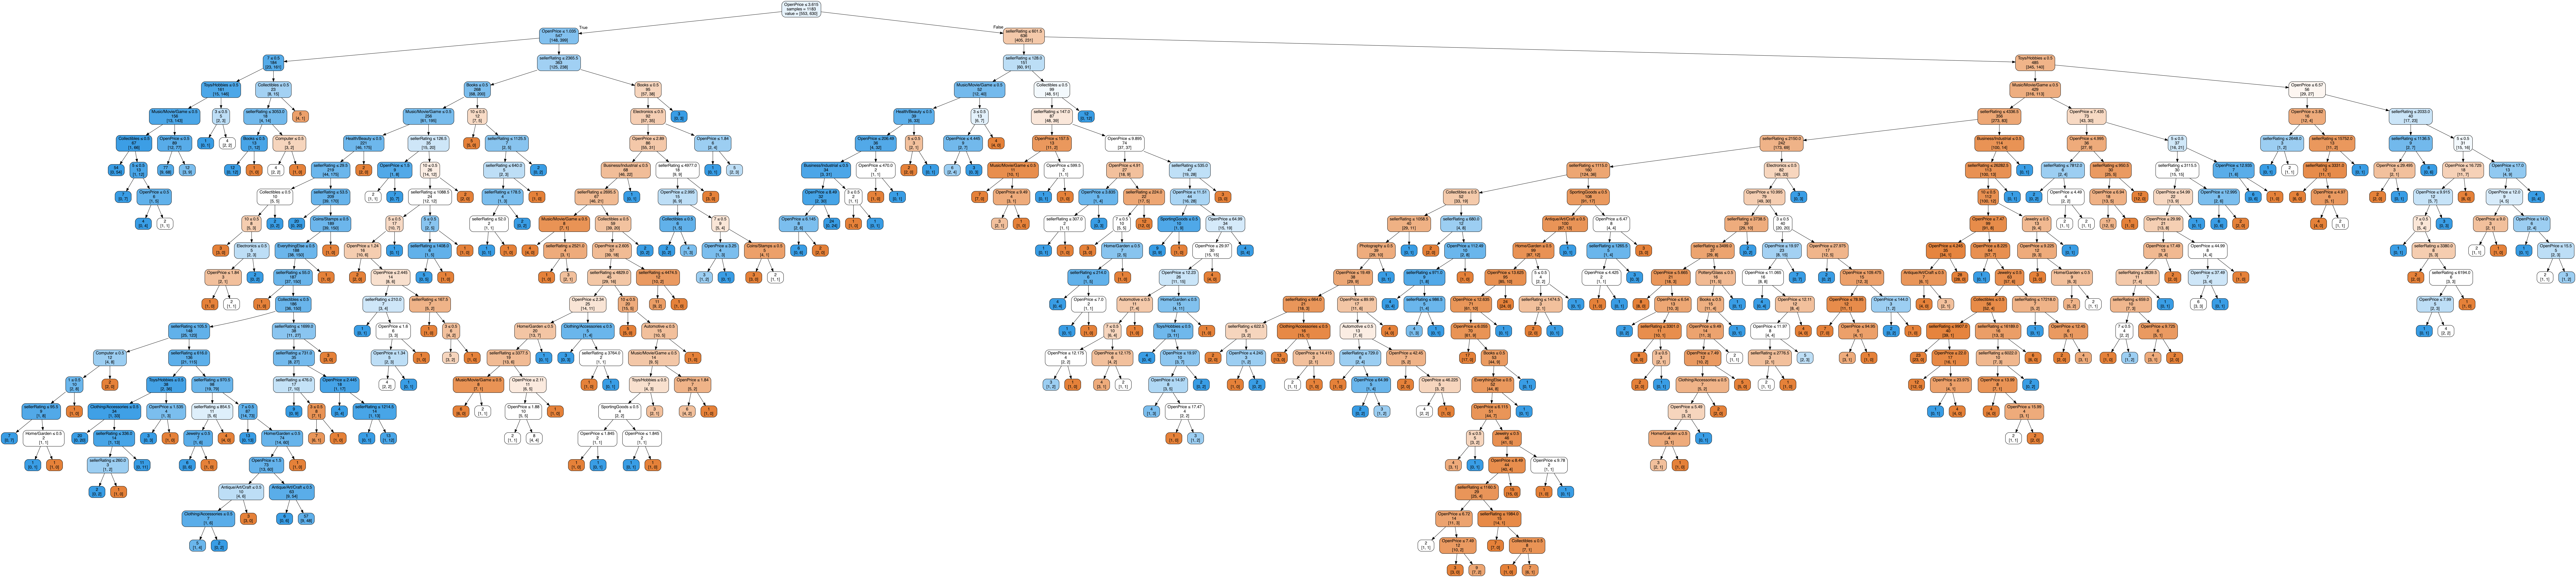

In [27]:
# partition the data into training (60%) and validation (40%) sets. use random_state=1 for reproducibility of results
training_X, valid_X, training_y, valid_y=train_test_split(X,y,test_size=0.4, random_state=1)
print(training_X.shape)

tree=DecisionTreeClassifier(random_state=1)
tree.fit(training_X, training_y)

print(tree.score(valid_X, valid_y))
plotDecisionTree(tree, feature_names=training_X.columns)

[0.6641318124207858, 0.7072243346007605, 0.7249683143219265, 0.7072243346007605, 0.6932826362484157, 0.7046894803548795, 0.7135614702154626, 0.7262357414448669, 0.7034220532319392, 0.7072243346007605, 0.6996197718631179, 0.6996197718631179, 0.6920152091254753, 0.6945500633713562, 0.6894803548795945, 0.6856780735107731, 0.6856780735107731, 0.6920152091254753, 0.6894803548795945, 0.6945500633713562]


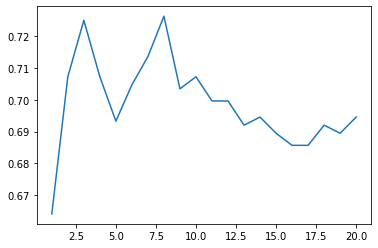

In [28]:
# Calculate the scores of the trees with 1-20 max_depth
# graph the results
scores=[]
for i in range(1,21):
    tree=DecisionTreeClassifier(random_state=1, max_depth=i)
    tree.fit(training_X, training_y)
    scores.append(tree.score(valid_X, valid_y))
print(scores)

%matplotlib inline
plt.plot(range(1,21),scores)
plt.show()

0.7072243346007605


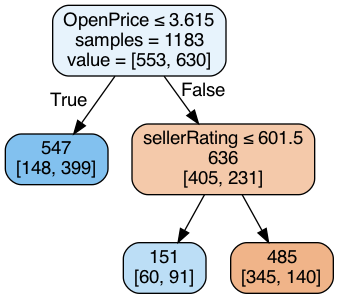

In [30]:
# prune the tree with the max_depth you have discovered to provide the best fit.
# set max_depth=3, min_samples_split=50, min_impurity_decrease=0.01, random_state=1 for your classifier
# print the score the pruned tree.
pruned_tree = DecisionTreeClassifier(random_state=1, max_depth = 3, min_samples_split=50, min_impurity_decrease=0.01)
pruned_tree.fit(training_X, training_y)
print(pruned_tree.score(valid_X, valid_y))
plotDecisionTree(pruned_tree,  feature_names=training_X.columns)


In [31]:
importances=tree.feature_importances_

for i in range(len(importances)):
    print(valid_X.columns[i],": ",importances[i])

sellerRating :  0.30426689762655773
1 :  0.0031381251479918252
3 :  0.01947330168230644
5 :  0.013411797100102799
7 :  0.018992077446032297
10 :  0.015007148901330113
OpenPrice :  0.42979666496013785
Antique/Art/Craft :  0.011390859379514656
Automotive :  0.002878949633537145
Books :  0.020342493751247206
Business/Industrial :  0.006888590774480719
Clothing/Accessories :  0.003283347155883357
Coins/Stamps :  0.0042520690693636015
Collectibles :  0.037682160955179844
Computer :  0.0055897854198604414
Electronics :  0.009581120824920962
EverythingElse :  0.00604588087548412
Health/Beauty :  0.009356519118511786
Home/Garden :  0.019647065849908017
Jewelry :  0.0073347748243541774
Music/Movie/Game :  0.024101817908692803
Photography :  0.0023790534099709763
Pottery/Glass :  0.003131120404357913
SportingGoods :  0.00844678685667801
Toys/Hobbies :  0.013581590923595213


In [ ]:
# Which features tend to be more relevant? Use data to back your answer.
# sellerRating and OpenPrice appear to be the most relevant

In [ ]:
# Interpret your results:
#with the above model we should be able to better predict the competitiveness of an ebay auction. 

# Lesson learned from this excercise:



# Predicting Delayed Flights

The file _flightdelays.csv_ contains information on all commercial flights departing the Washington, DC area and arriving at New York during January 2004. For each flight, there is information on the departure and arrival airports, the distance of the route, the scheduled time and date of the flight, and so on. The variable that we are trying to predict is whether or not a flight is delayed. A delay is defined as an arrival that is at least 15 minutes later than scheduled. The predictors we are using are CARRIER, DEST, DISTANCE, ORIGIN, Weather, DAY_WEEK, and CRS_DEP_TIME.

__Data Preprocessing.__ Transform variable day of week info (DAY_WEEK), carrier name (CARRIER), desitnation (DEST) a categorical variable. Bin the scheduled departure time (CRS_DEP_TIME) into eight bins. Partition the data into training (60%) and validation (40%) sets.

In [10]:
# Load the data into delays_df dataframe
# Use critical functions to explore the dataframe using print() to show results
delays_df=pd.read_csv("flightdelays.csv")

print(delays_df.columns)
print(delays_df.describe)

Index(['CRS_DEP_TIME', 'CARRIER', 'DEP_TIME', 'DEST', 'DISTANCE', 'FL_DATE',
       'FL_NUM', 'ORIGIN', 'Weather', 'DAY_WEEK', 'DAY_OF_MONTH', 'TAIL_NUM',
       'Flight Status'],
      dtype='object')
<bound method NDFrame.describe of       CRS_DEP_TIME CARRIER  DEP_TIME DEST  DISTANCE     FL_DATE  FL_NUM  \
0             1455      OH      1455  JFK       184  01/01/2004    5935   
1             1640      DH      1640  JFK       213  01/01/2004    6155   
2             1245      DH      1245  LGA       229  01/01/2004    7208   
3             1715      DH      1709  LGA       229  01/01/2004    7215   
4             1039      DH      1035  LGA       229  01/01/2004    7792   
...            ...     ...       ...  ...       ...         ...     ...   
2196           645      RU       644  EWR       199   1/31/2004    2761   
2197          1700      RU      1653  EWR       213   1/31/2004    2497   
2198          1600      RU      1558  EWR       199   1/31/2004    2361   
2199          

In [11]:
# convert variable DAY_WEEK to categorical data type
dummy_day=pd.get_dummies(delays_df['DAY_WEEK'])

delays_df = pd.concat([delays_df,dummy_day],axis=1)


dummy_CARRIER=pd.get_dummies(delays_df['CARRIER'])

delays_df = pd.concat([delays_df,dummy_CARRIER],axis=1)


dummy_ORIGIN=pd.get_dummies(delays_df['ORIGIN'])

delays_df = pd.concat([delays_df,dummy_ORIGIN],axis=1)


dummy_DEST=pd.get_dummies(delays_df['DEST'])

delays_df = pd.concat([delays_df,dummy_DEST],axis=1)

In [12]:
# bin CRS_DEP_TIME variable into 8 bins
# equal width binning method is suitable in this case becuase the flights are departing a certain frequency.
# binning in this case is useful because the flight dep time has too much more categorical values in a column than necessary. 
# the following code is given to you.

delays_df['binned_CRS_DEP_TIME'] = pd.cut(delays_df.CRS_DEP_TIME, 8, labels=False)
delays_df['binned_CRS_DEP_TIME'].astype('category')

0       4
1       5
2       3
3       5
4       2
       ..
2196    0
2197    5
2198    5
2199    3
2200    5
Name: binned_CRS_DEP_TIME, Length: 2201, dtype: category
Categories (8, int64): [0, 1, 2, 3, 4, 5, 6, 7]

In [13]:
print(delays_df.head())
print(delays_df.columns)

   CRS_DEP_TIME CARRIER  DEP_TIME DEST  DISTANCE     FL_DATE  FL_NUM ORIGIN  \
0          1455      OH      1455  JFK       184  01/01/2004    5935    BWI   
1          1640      DH      1640  JFK       213  01/01/2004    6155    DCA   
2          1245      DH      1245  LGA       229  01/01/2004    7208    IAD   
3          1715      DH      1709  LGA       229  01/01/2004    7215    IAD   
4          1039      DH      1035  LGA       229  01/01/2004    7792    IAD   

   Weather  DAY_WEEK  ...  RU UA US  BWI  DCA  IAD  EWR  JFK  LGA  \
0        0         4  ...   0  0  0    1    0    0    0    1    0   
1        0         4  ...   0  0  0    0    1    0    0    1    0   
2        0         4  ...   0  0  0    0    0    1    0    0    1   
3        0         4  ...   0  0  0    0    0    1    0    0    1   
4        0         4  ...   0  0  0    0    0    1    0    0    1   

   binned_CRS_DEP_TIME  
0                    4  
1                    5  
2                    3  
3         

In [14]:
# construct predictors (X) and outcome (y)
X = delays_df[['DISTANCE', 'Weather', 'binned_CRS_DEP_TIME',       1,                     2,
                           3,                     4,                     5,
                           6,                     7,                  'CO',
                        'DH',                  'DL',                  'MQ',
                        'OH',                  'RU',                  'UA',
                        'US',                 'BWI',                 'DCA',
                       'IAD',                 'EWR',                 'JFK',
                       'LGA']]



y = delays_df['Flight Status']


print(X.head(),"\n",y.head())

   DISTANCE  Weather  binned_CRS_DEP_TIME  1  2  3  4  5  6  7  ...  OH  RU  \
0       184        0                    4  0  0  0  1  0  0  0  ...   1   0   
1       213        0                    5  0  0  0  1  0  0  0  ...   0   0   
2       229        0                    3  0  0  0  1  0  0  0  ...   0   0   
3       229        0                    5  0  0  0  1  0  0  0  ...   0   0   
4       229        0                    2  0  0  0  1  0  0  0  ...   0   0   

   UA  US  BWI  DCA  IAD  EWR  JFK  LGA  
0   0   0    1    0    0    0    1    0  
1   0   0    0    1    0    0    1    0  
2   0   0    0    0    1    0    0    1  
3   0   0    0    0    1    0    0    1  
4   0   0    0    0    1    0    0    1  

[5 rows x 24 columns] 
 0    ontime
1    ontime
2    ontime
3    ontime
4    ontime
Name: Flight Status, dtype: object


In [15]:
# create dummies for categorical variables
#See earlier cell for dummies

In [16]:
# Partition the data into training (60%) and validation (40%) sets.

training_X, valid_X, training_y, valid_y=train_test_split(X,y,test_size=0.4, random_state=1)
print(training_X.shape)


(1320, 24)


In [17]:
# create the random forest

forest = RandomForestClassifier(random_state=5, n_estimators=101, max_features="sqrt")

In [20]:
# train the forest
# fit the model
# evaluate the model on validation set.
forest.fit(training_X, training_y)
print(forest.score(valid_X,valid_y))

importances=forest.feature_importances_

for i in range(len(importances)):
    print(valid_X.columns[i],": ",importances[i])

0.7684449489216799
DISTANCE :  0.03774991393756263
Weather :  0.05228792430052109
binned_CRS_DEP_TIME :  0.42238860700253833
1 :  0.04752626564515768
2 :  0.041707129416555744
3 :  0.034880655522738044
4 :  0.03952481967303356
5 :  0.03878881943564805
6 :  0.03422018616847323
7 :  0.039566577461210124
CO :  0.009309712071012017
DH :  0.017929033330564385
DL :  0.025892900391376227
MQ :  0.0342736667833844
OH :  0.0015368996027253735
RU :  0.01460834999892033
UA :  0.0025041721701739342
US :  0.022353340404401914
BWI :  0.005868251776415599
DCA :  0.014904133981295245
IAD :  0.011714778721859517
EWR :  0.014737532604972582
JFK :  0.017447145877342564
LGA :  0.018279183722117558


In [19]:
# Which features tend to be more relevant? Use score to back up your answer.
# With a score of 0.768... we can say this is a fairly good model, binned_CRS_DEP_TIME seems to be the most important variable with a score of 0.4223.... 

In [ ]:
# Interpret your results:
#with the above model we should be able to better predict the on flight status of a flight. 



# Lesson learned from this excercise:


